# Obligatorio de Análisis predictivo de series temporales

José Diaz (230253)

Juan Diego Mattos (262316)

Matias Mendez (140709)

## Librerias y Configuración Inicial

In [1]:
#install.packages('astsa')
#install.packages('tidyverse')
#install.packages('forecast')

library('astsa')
library('tidyverse')
library('forecast')

options(repr.plot.width=8, repr.plot.height=5)
options(scipen=999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



## Variables importantes

Time Series:

 - world_ts ==> Time Series de los datos de CO2 en el mundo de 1960 a 2016

 - br_ts ==> Time Series de los datos de CO2 en brasil de 1960 a 2016
 
 - amazon_fires_ts ==> Time Series del número de incendios en el amazonas de 1998 a 2016

FITS Mundo:

 - fit_world_lineal ===> Ajuste lineal a world_ts

 - fit_2_world ===> Ajuste cuadrático a world_ts

 - fit_3_world ===> Ajuste cúbico a world_ts
 
FITS Brasil:

 - fit_br_lineal ===> Ajuste lineal a br_ts

 - fit_2_br ===> Ajuste cuadrático a br_ts

 - fit_3_br ===> Ajuste cúbico a br_ts

RESIDUALS Mundo:

 - res_world_lineal ===> residuos de ajuste lineal mundo
 - res_world_2 ===> residuos de ajuste cuadrático mundo
 - res_world_3 ===> residuos de ajuste cúbico mundo

RESIDUALS Brasil:

 - res_br_lineal ===> residuos de ajuste lineal brasil
 - res_br_2 ===> residuos de ajuste cuadrático brasil
 - res_br_3 ===> residuos de ajuste cúbico brasil



## Ingesta de datos

### Datos de CO2

In [2]:
co2_data = read.csv2('./data/co2_data.csv', header = TRUE, sep = ',', dec = '.')
head(co2_data)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,X1960,X1961,X1962,X1963,X1964,X1965,⋯,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Aruba,ABW,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,⋯,1349.456,861.745,872.746,898.415,883.747,NA,NA,NA,NA,NA
Afganistán,AFG,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,⋯,10755.311,9050.156,8467.103,9035.488,8672.455,NA,NA,NA,NA,NA
Angola,AGO,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,⋯,34176.440,33692.396,44851.077,34583.477,34693.487,NA,NA,NA,NA,NA
Albania,ALB,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,⋯,4924.781,4913.780,5489.499,4616.753,4536.079,NA,NA,NA,NA,NA
Andorra,AND,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,NA,NA,NA,NA,NA,NA,⋯,487.711,476.710,462.042,465.709,469.376,NA,NA,NA,NA,NA
El mundo árabe,ARB,Emisiones de CO2 (kt),EN.ATM.CO2E.KT,56005.300,62578.606,70562.051,85085.752,99693.914,120039.536,⋯,1841219.035,1823115.056,1932296.314,1953773.933,1904104.418,NA,NA,NA,NA,NA


#### En el mundo

In [3]:
world_data = co2_data %>% filter(co2_data$Country.Name =='Mundo') # Obtener la fila 'Mundo'
world_data = world_data %>% select(c(5:length(world_data))) # Quitar los valores: Name, Code, Indicator, Indicator Code

# Eliminar los valores nan:
world_data["X2017"]=NULL
world_data["X2018"]=NULL
world_data["X2019"]=NULL
world_data["X2020"]=NULL
world_data["X"]=NULL

head(world_data) # Datos del mundo de CO2 de 1960 a 2016

X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,⋯,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9213448,9174599,9475007,10002665,10533974,11100890,11671139,12084924,12741086,13606233,⋯,29513157,30680656,29915812,31927784,33090763,33683607,33848273,34103193,34040671,33819401


#### Particularmente, en Brasil

In [4]:
br_data = co2_data %>% filter(co2_data$Country.Name =='Brasil') # Obtener la fila 'Brasil'
br_data = br_data %>% select(c(5:length(br_data))) # Quitar los valores: Name, Code, Indicator, Indicator Code

# Eliminar los valores nan:
br_data["X2017"]=NULL
br_data["X2018"]=NULL
br_data["X2019"]=NULL
br_data["X2020"]=NULL
br_data["X"]=NULL

head(br_data) # Datos de Brasil de CO2 de 1960 a 2016

X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,X1969,⋯,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46908.26,49203.81,53695.88,55617.39,56735.82,56398.46,64304.51,66193.02,77421.37,84315.33,⋯,363212.7,387631.2,367147.4,419754.2,439412.9,470028.7,503677.1,533530.2,504388.5,462298.7


## Análisis Exploratorio

### Transformar los datos a time series

In [5]:
world_ts = ts(t(world_data), start = 1960, frequency = 1)

br_ts = ts(t(br_data), start = 1960, frequency = 1)

### Graficar las time series

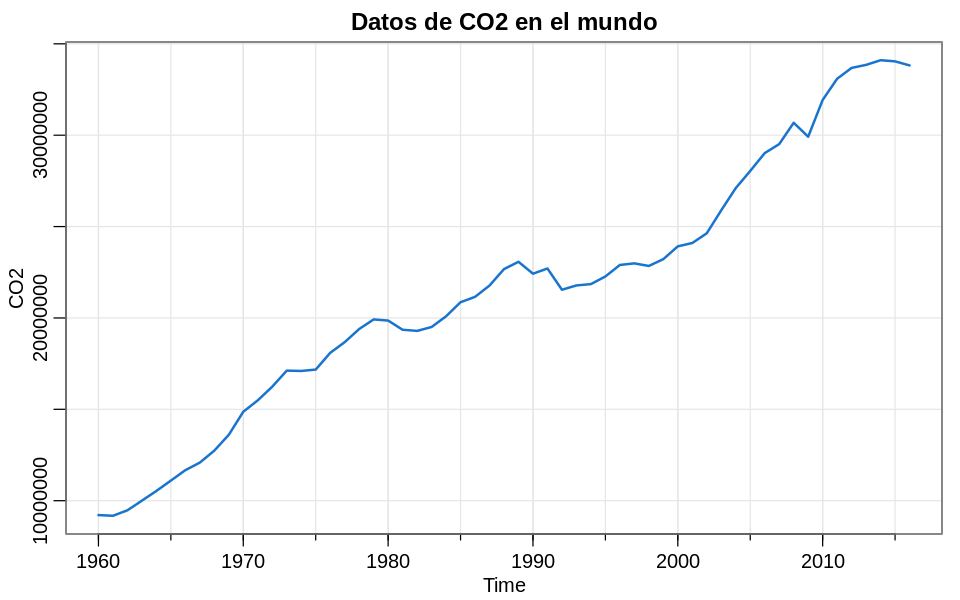

In [6]:
tsplot(world_ts, lw = 2, col = 4, main='Datos de CO2 en el mundo', ylab='CO2')

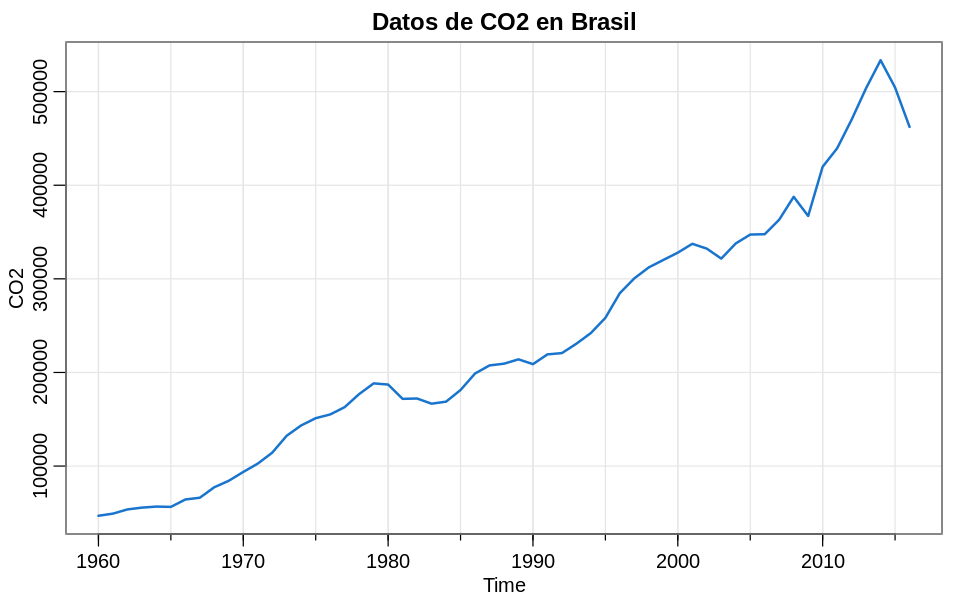

In [7]:
tsplot(br_ts, lw = 2, col = 4, main='Datos de CO2 en Brasil', ylab='CO2')

### Autocorrelaciones

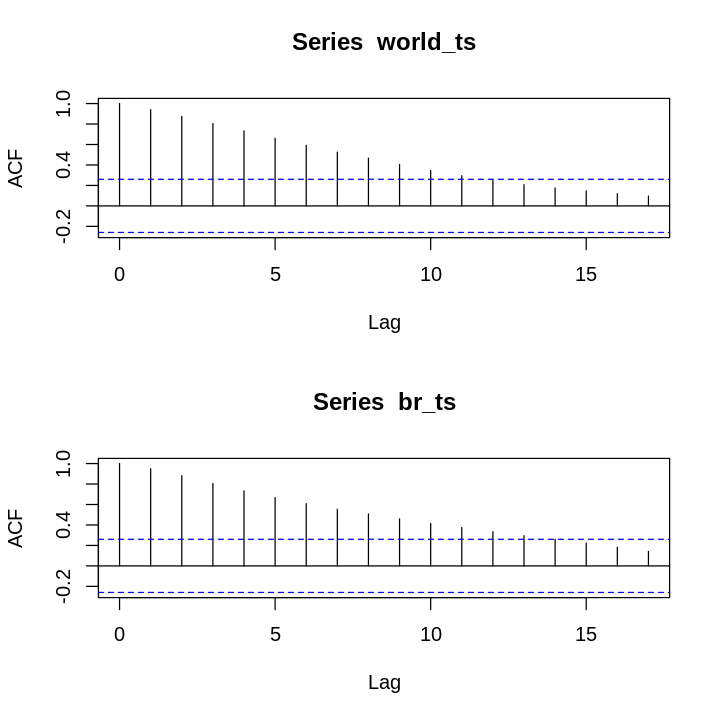

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow=c(2,1))
acf(world_ts)
acf(br_ts)

### Regresión Lineal

In [9]:
options(repr.plot.width=7, repr.plot.height=5)

trend = time(world_ts)
trend_br = time(br_ts)

fit_world_lineal <- lm(world_ts ~ trend)
summary(fit_world_lineal)

fit_br_lineal <- lm(br_ts ~ trend)
summary(fit_br_lineal)


Call:
lm(formula = world_ts ~ trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-2787649 -1122662   135800  1214064  2303918 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -800289234   24243440  -33.01 <0.0000000000000002 ***
trend           413354      12194   33.90 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1515000 on 55 degrees of freedom
Multiple R-squared:  0.9543,	Adjusted R-squared:  0.9535 
F-statistic:  1149 on 1 and 55 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = br_ts ~ trend)

Residuals:
   Min     1Q Median     3Q    Max 
-44140 -20995    488  16219  96397 

Coefficients:
               Estimate  Std. Error t value            Pr(>|t|)    
(Intercept) -15334942.8    460507.8  -33.30 <0.0000000000000002 ***
trend            7831.2       231.6   33.81 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28770 on 55 degrees of freedom
Multiple R-squared:  0.9541,	Adjusted R-squared:  0.9533 
F-statistic:  1143 on 1 and 55 DF,  p-value: < 0.00000000000000022


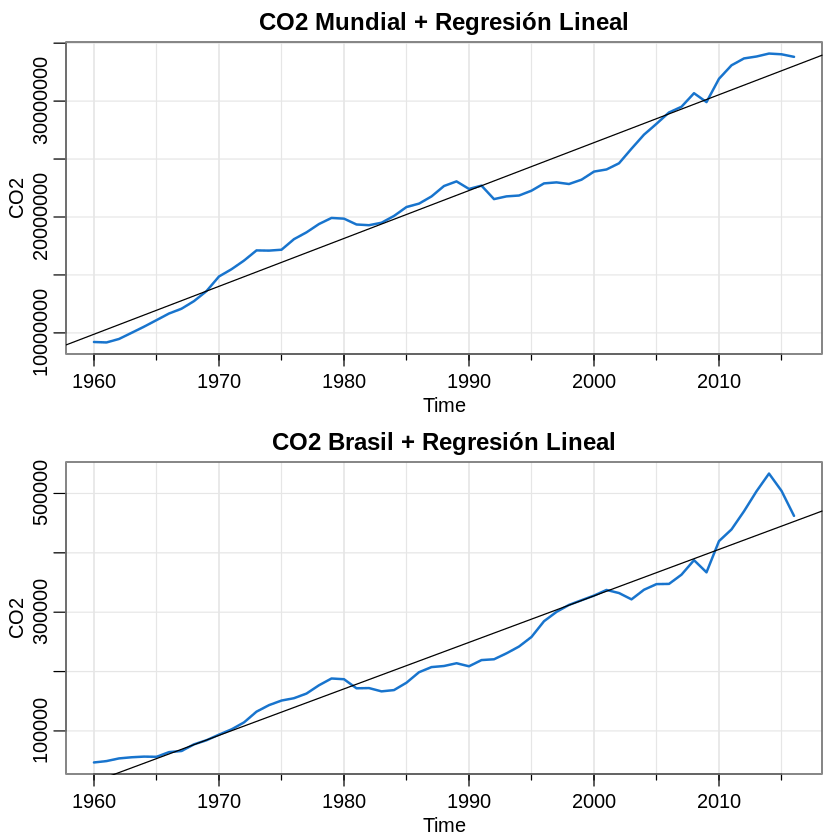

In [10]:
options(repr.plot.width=7, repr.plot.height=7)

par(mfrow=c(2,1))

tsplot(world_ts, ylab='CO2', main = 'CO2 Mundial + Regresión Lineal', col=4, lwd=2)
abline(fit_world_lineal)

tsplot(br_ts, ylab='CO2', main = 'CO2 Brasil + Regresión Lineal', col=4, lwd=2)
abline(fit_br_lineal)

### Regresión Cuadrática y Cúbica

In [11]:
t = time(world_ts)
t2 = time(world_ts)^2
t3 = time(world_ts)^3

fit_2_world = lm(world_ts ~ t + t2)
fit_3_world = lm(world_ts ~ t + t2 + t3)

summary(fit_2_world)
summary(fit_3_world)

t = time(br_ts)
t2 = time(br_ts)^2
t3 = time(br_ts)^3

fit_2_br = lm(br_ts ~ t + t2)
fit_3_br = lm(br_ts ~ t + t2 + t3)

summary(fit_2_br)
summary(fit_3_br)


Call:
lm(formula = world_ts ~ t + t2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2673004 -1374336   300506  1211390  2324779 

Coefficients:
                Estimate   Std. Error t value Pr(>|t|)
(Intercept) 2226855355.2 3280983615.3   0.679    0.500
t             -2632271.3    3300946.6  -0.797    0.429
t2                 766.0        830.2   0.923    0.360

Residual standard error: 1517000 on 54 degrees of freedom
Multiple R-squared:  0.955,	Adjusted R-squared:  0.9534 
F-statistic: 573.4 on 2 and 54 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = world_ts ~ t + t2 + t3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2357589  -794215   -39087   681704  1685639 

Coefficients:
                     Estimate        Std. Error t value         Pr(>|t|)    
(Intercept) -2596254478476.66   284050879555.85  -9.140 0.00000000000177 ***
t               3918939394.79      428677149.39   9.142 0.00000000000176 ***
t2                -1971936.59         215639.33  -9.145 0.00000000000174 ***
t3                     330.77             36.16   9.148 0.00000000000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 953300 on 53 degrees of freedom
Multiple R-squared:  0.9826,	Adjusted R-squared:  0.9816 
F-statistic: 995.5 on 3 and 53 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = br_ts ~ t + t2)

Residuals:
   Min     1Q Median     3Q    Max 
-43924 -13812  -5151  11126  65237 

Coefficients:
                Estimate   Std. Error t value     Pr(>|t|)    
(Intercept) 288471064.09  47286833.22   6.100 0.0000001176 ***
t             -297829.56     47574.55  -6.260 0.0000000650 ***
t2                 76.88        11.97   6.425 0.0000000353 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21860 on 54 degrees of freedom
Multiple R-squared:  0.974,	Adjusted R-squared:  0.973 
F-statistic:  1011 on 2 and 54 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = br_ts ~ t + t2 + t3)

Residuals:
   Min     1Q Median     3Q    Max 
-53999 -13521  -3350  14282  51032 

Coefficients:
                     Estimate        Std. Error t value Pr(>|t|)    
(Intercept) -22420557890.0043   5787324348.1080  -3.874 0.000296 ***
t               33974144.3626      8733976.4905   3.890 0.000282 ***
t2                -17163.2552         4393.4902  -3.907 0.000267 ***
t3                     2.8907            0.7367   3.924 0.000252 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19420 on 53 degrees of freedom
Multiple R-squared:  0.9798,	Adjusted R-squared:  0.9787 
F-statistic: 858.6 on 3 and 53 DF,  p-value: < 0.00000000000000022


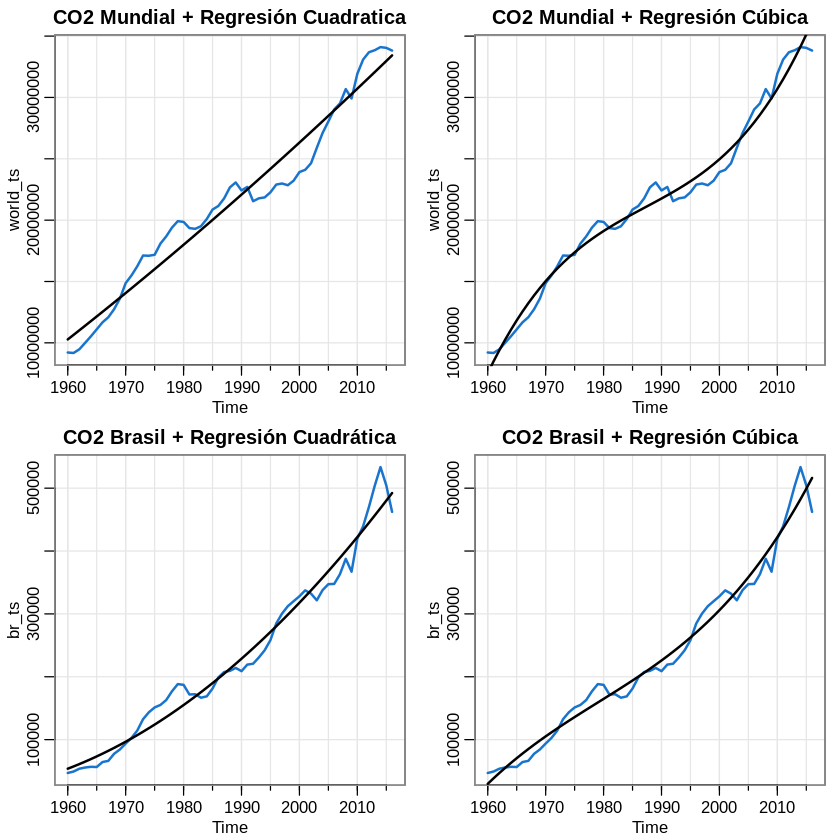

In [12]:
par(mfrow=c(2,2))

predictions = ts(fitted(fit_2_world), start = 1960, frequency = frequency(world_ts))
tsplot(world_ts, col=4, lwd=2, main ='CO2 Mundial + Regresión Cuadratica')
lines(predictions, lwd=2)

predictions = ts(fitted(fit_3_world), start = 1960, frequency = frequency(world_ts))
tsplot(world_ts, col=4, lwd=2, main ='CO2 Mundial + Regresión Cúbica')
lines(predictions, lwd=2)

predictions = ts(fitted(fit_2_br), start = 1960, frequency = frequency(br_ts))
tsplot(br_ts, col=4, lwd=2, main ='CO2 Brasil + Regresión Cuadrática')
lines(predictions, lwd=2)

predictions = ts(fitted(fit_3_br), start = 1960, frequency = frequency(br_ts))
tsplot(br_ts, col=4, lwd=2, main ='CO2 Brasil + Regresión Cúbica')
lines(predictions, lwd=2)

### Análisis de Residuos

In [13]:
# Residuos Mundo CO2
res_world_lineal = residuals(fit_world_lineal)
res_world_2 = residuals(fit_2_world)
res_world_3 = residuals(fit_3_world)

# Residuos Brasil CO2
res_br_lineal = residuals(fit_br_lineal)
res_br_2 = residuals(fit_2_br)
res_br_3 = residuals(fit_3_br)

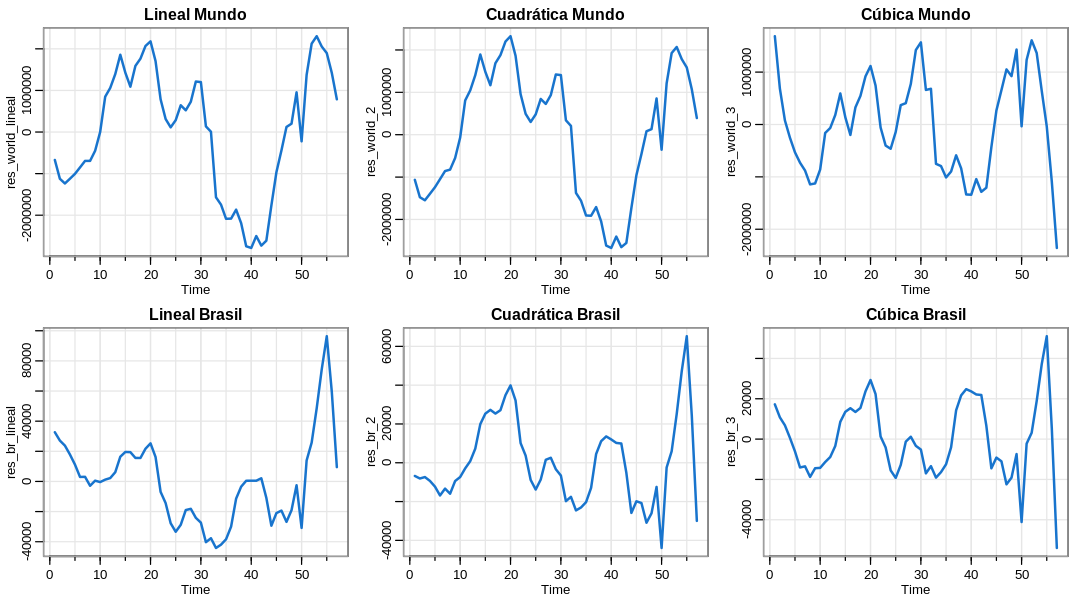

In [14]:
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow=c(2,3))

tsplot(res_world_lineal, col=4,lwd=2, main ='Lineal Mundo')
tsplot(res_world_2, col=4,lwd=2, main ='Cuadrática Mundo')
tsplot(res_world_3, col=4,lwd=2, main ='Cúbica Mundo')

tsplot(res_br_lineal, col=4,lwd=2, main ='Lineal Brasil')
tsplot(res_br_2, col=4,lwd=2, main ='Cuadrática Brasil')
tsplot(res_br_3, col=4,lwd=2, main ='Cúbica Brasil')

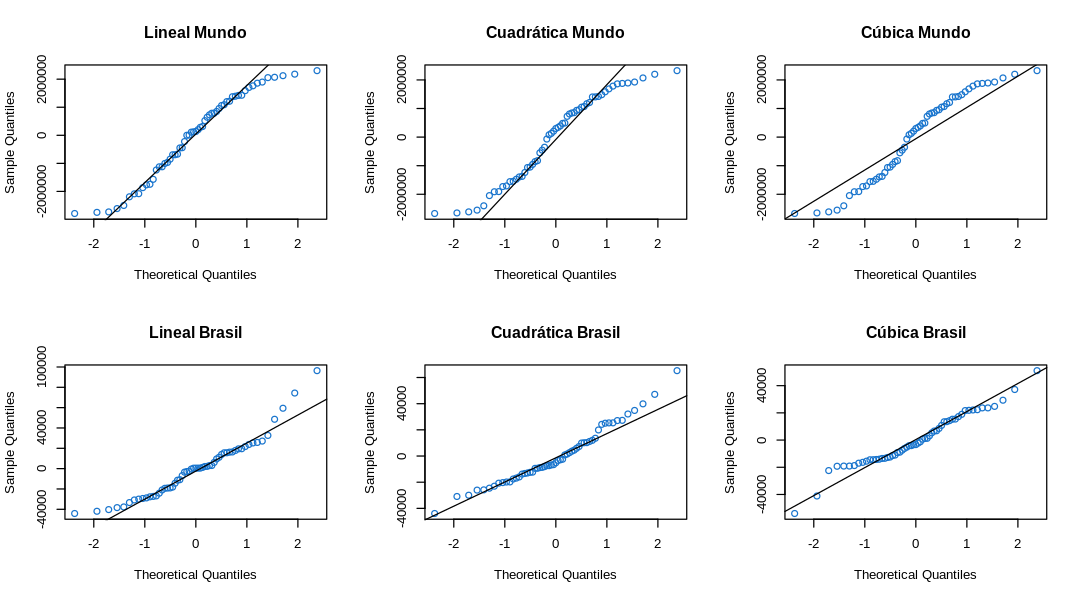

In [15]:
par(mfrow=c(2,3))

qqnorm(res_world_lineal, col=4, main = 'Lineal Mundo')
qqline(res_world_lineal)
qqnorm(res_world_2, col=4, main ='Cuadrática Mundo')
qqline(res_world_2)
qqnorm(res_world_2, col=4, main ='Cúbica Mundo')
qqline(res_world_3)

qqnorm(res_br_lineal, col=4, main ='Lineal Brasil')
qqline(res_br_lineal)
qqnorm(res_br_2, col=4, main ='Cuadrática Brasil')
qqline(res_br_2)
qqnorm(res_br_3, col=4, main ='Cúbica Brasil')
qqline(res_br_3)

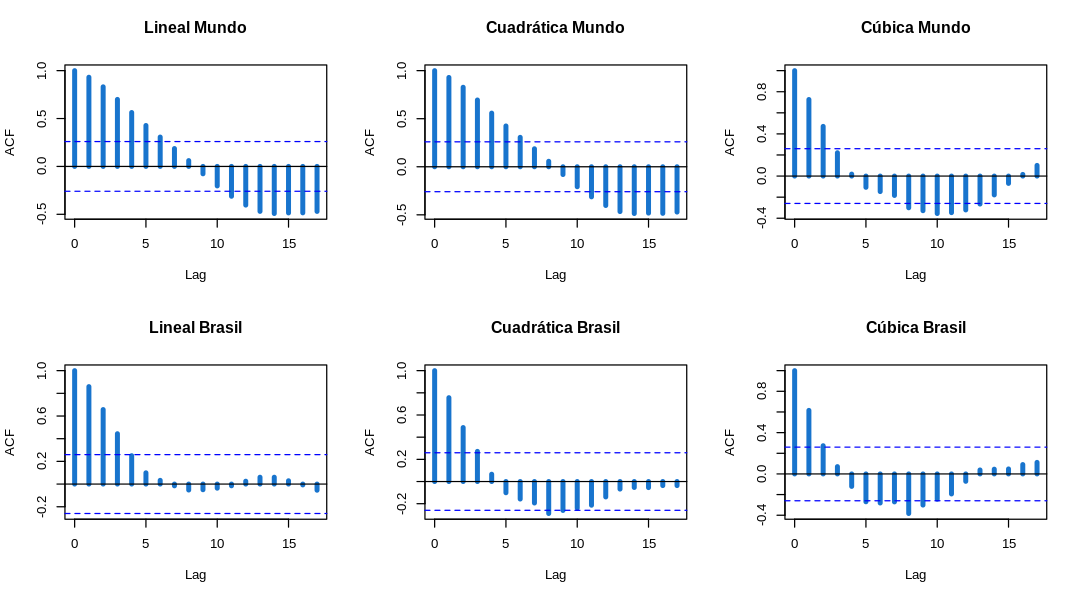

In [16]:
par(mfrow=c(2,3))

acf(res_world_lineal, col=4, lwd=4, main = 'Lineal Mundo')
acf(res_world_2, col=4, lwd=4, main = 'Cuadrática Mundo')
acf(res_world_3, col=4, lwd=4, main = 'Cúbica Mundo')

acf(res_br_lineal, col=4, lwd=4, main = 'Lineal Brasil')
acf(res_br_2, col=4, lwd=4, main = 'Cuadrática Brasil')
acf(res_br_3, col=4, lwd=4, main = 'Cúbica Brasil')

### AIC y BIC

In [17]:
AIC(fit_world_lineal)
AIC(fit_2_world)
AIC(fit_3_world)
print('===')
BIC(fit_world_lineal)
BIC(fit_2_world)
BIC(fit_3_world)

[1] 1788.024

[1] 1789.132

[1] 1737.129

[1] "==="


[1] 1794.153

[1] 1797.304

[1] 1747.345

In [18]:
AIC(fit_br_lineal)
AIC(fit_2_br)
AIC(fit_3_br)
print('===')
BIC(fit_br_lineal)
BIC(fit_2_br)
BIC(fit_3_br)

[1] 1336.177

[1] 1305.81

[1] 1293.272

[1] "==="


[1] 1342.306

[1] 1313.982

[1] 1303.487

### Periodograma

#### Residuo Mundo CO2

In [19]:
time(world_ts)

A Time Series:
 [1] 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
[16] 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
[31] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
[46] 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016

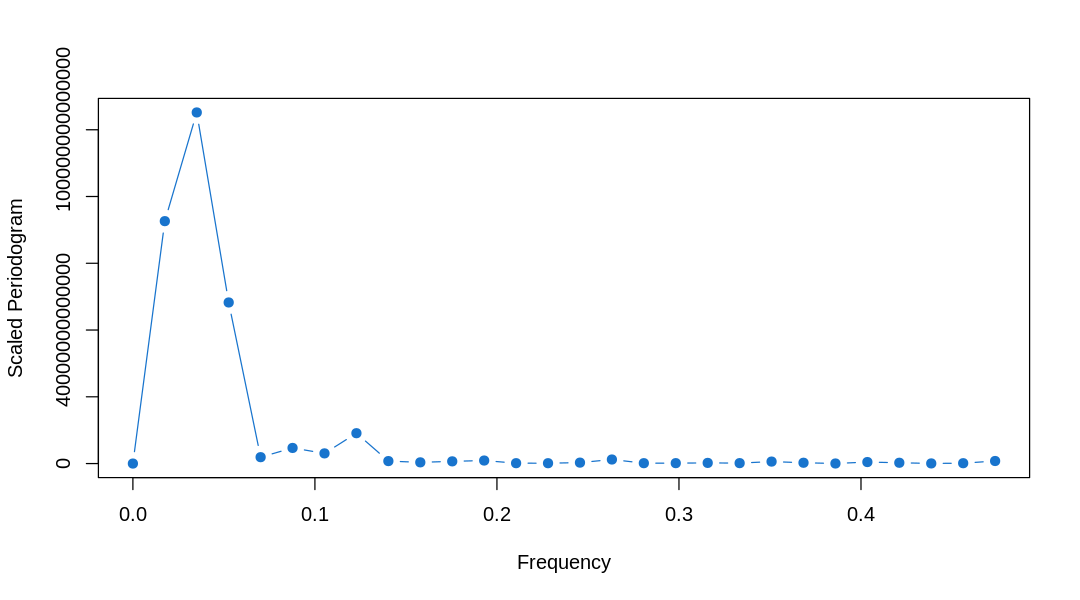

In [20]:
s = as.numeric(res_world_lineal)
#s = s - mean(s)

n = length(s)

P = 4/n*abs(fft(s))^2

P = P[1:floor(n/2)]

f = (0:(n/2-1))/n


# 1 ciclo cada 25 ---> sen[2*pi*(1/25)] + cos[2*pi*(1/25)]
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", col=4, lwd=1, pch=19)

#### Residuo Brasil CO2

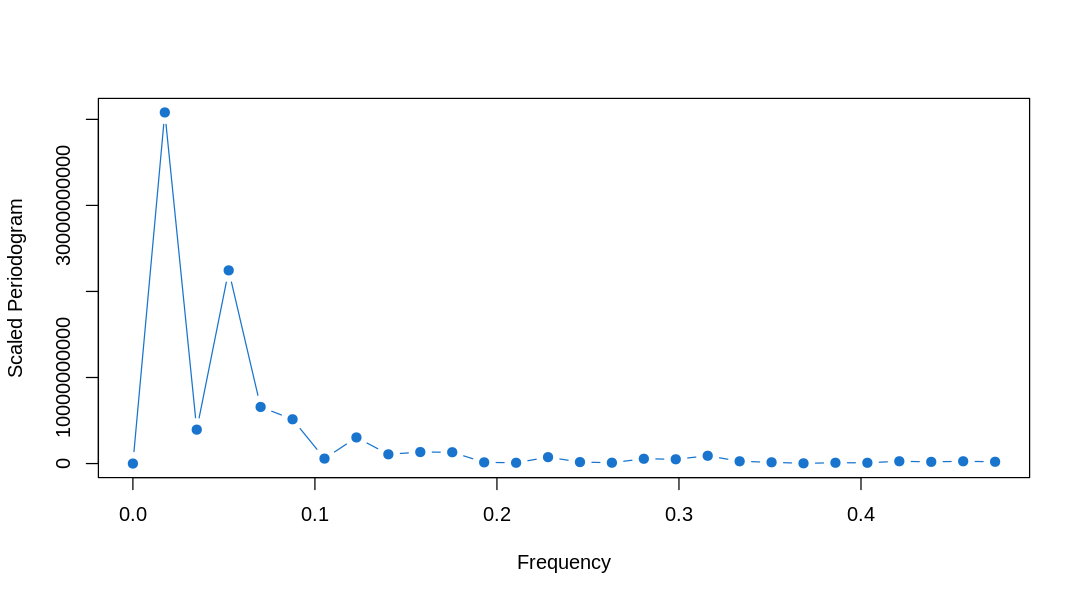

In [21]:
s = as.numeric(res_br_lineal)
#s = s - mean(s)

n = length(s)

P = 4/n*abs(fft(s))^2

P = P[1:floor(n/2)] 

f = (0:(n/2-1))/n

plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", col=4, lwd=1, pch=19)

## Relación Entre Incendios en Brasil y CO2

### Importar los datos de incendios en el amazonas

In [22]:
amazon_fires_data = read.csv2('./data/amazonas_fires.csv', header = TRUE, sep = ',', dec = '.')
head(amazon_fires_data)
fires_month = amazon_fires_data$number

year,state,month,number,date
<int>,<fct>,<fct>,<dbl>,<fct>
1998,Amazonas,Janeiro,0,1998-01-01
1998,Amazonas,Fevereiro,0,1998-01-01
1998,Amazonas,Mar�o,0,1998-01-01
1998,Amazonas,Abril,0,1998-01-01
1998,Amazonas,Maio,0,1998-01-01
1998,Amazonas,Junho,2,1998-01-01


### Transformarlo a una time series y graficar

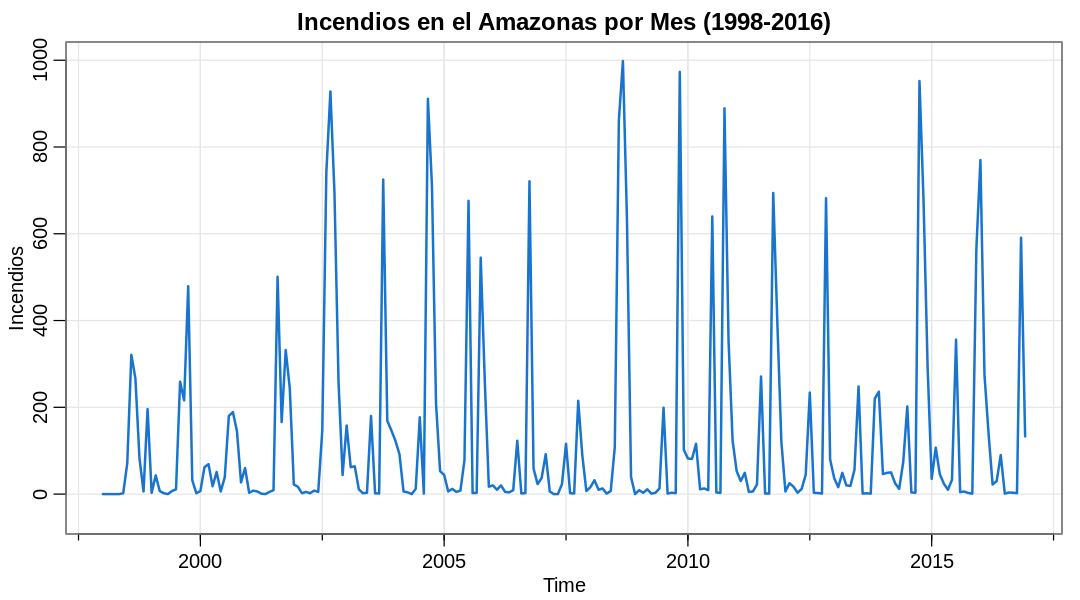

In [23]:
amazon_fires_ts = ts(fires_month, start = 1998, frequency = 12)
tsplot(
    amazon_fires_ts,
    lw = 2, 
    col = 4, 
    main='Incendios en el Amazonas por Mes (1998-2016)', 
    ylab='Incendios', 
    ylim = c(-50, 1000)
)

### Relación entre series

In [24]:
# Pasar la serie a una frecuencia anual
amazon_fires_ts = aggregate(amazon_fires_ts, nfrequency=1, FUN=sum)

In [25]:
# Tomo los años de br_ts que coinciden con la de los incendios
br_ts_same_years = time(tail(br_ts, 19))
world_ts_same_years = time(tail(world_ts, 19))

In [26]:
time(amazon_fires_ts)

A Time Series:
 [1] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
[16] 2013 2014 2015 2016

In [27]:
time(br_ts_same_years)
time(world_ts_same_years)

A Time Series:
 [1] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
[16] 2013 2014 2015 2016

A Time Series:
 [1] 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
[16] 2013 2014 2015 2016

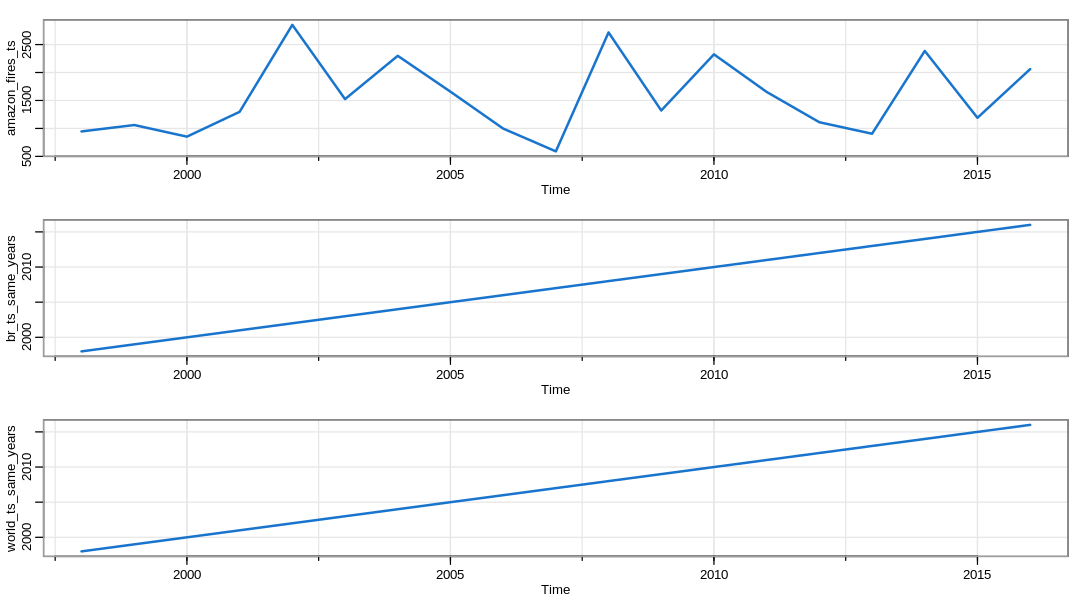

In [28]:
par(mfrow=c(3,1))

tsplot(amazon_fires_ts, lw = 2, c = 4)
tsplot(br_ts_same_years, lw = 2, c = 4)
tsplot(world_ts_same_years, lw = 2, c = 4)

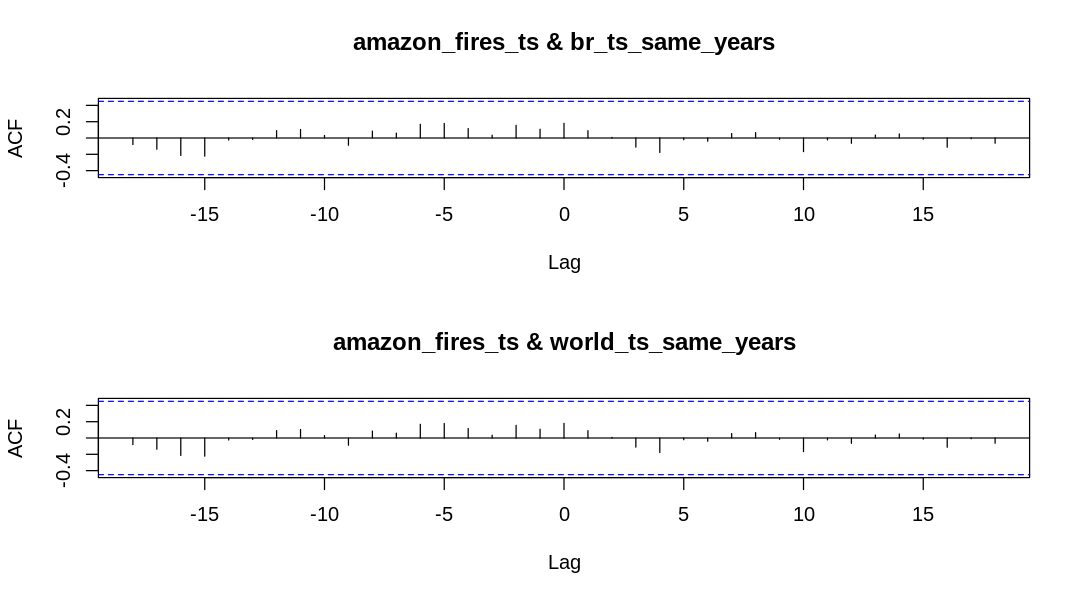

In [39]:
# Ver la ccf de los residuos con los incendios o de la diff de la time series con los incendios
par(mfrow=c(2,1))

ccf(amazon_fires_ts, br_ts_same_years, 20)
ccf(amazon_fires_ts, world_ts_same_years, 20)

### Relación con lags

In [30]:
# lag(amazon_fires_ts, 2)

## Autocorrelación parcial

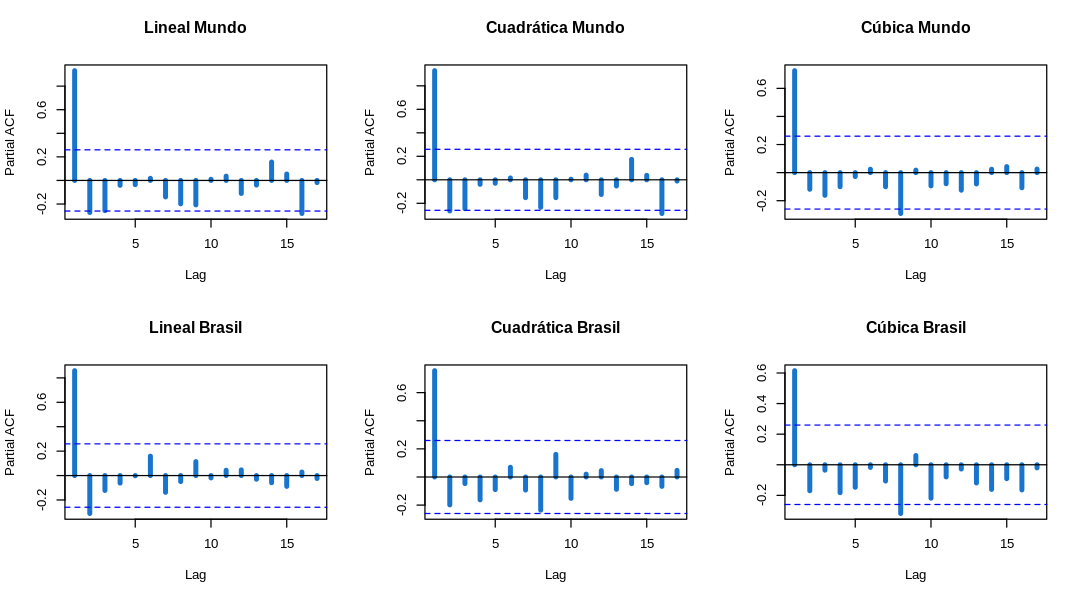

In [31]:
par(mfrow=c(2,3))

pacf(res_world_lineal, col=4, lwd=4, main = 'Lineal Mundo')
pacf(res_world_2, col=4, lwd=4, main = 'Cuadrática Mundo')
pacf(res_world_3, col=4, lwd=4, main = 'Cúbica Mundo')

pacf(res_br_lineal, col=4, lwd=4, main = 'Lineal Brasil')
pacf(res_br_2, col=4, lwd=4, main = 'Cuadrática Brasil')
pacf(res_br_3, col=4, lwd=4, main = 'Cúbica Brasil')

## Modelo ARIMA y Predicción

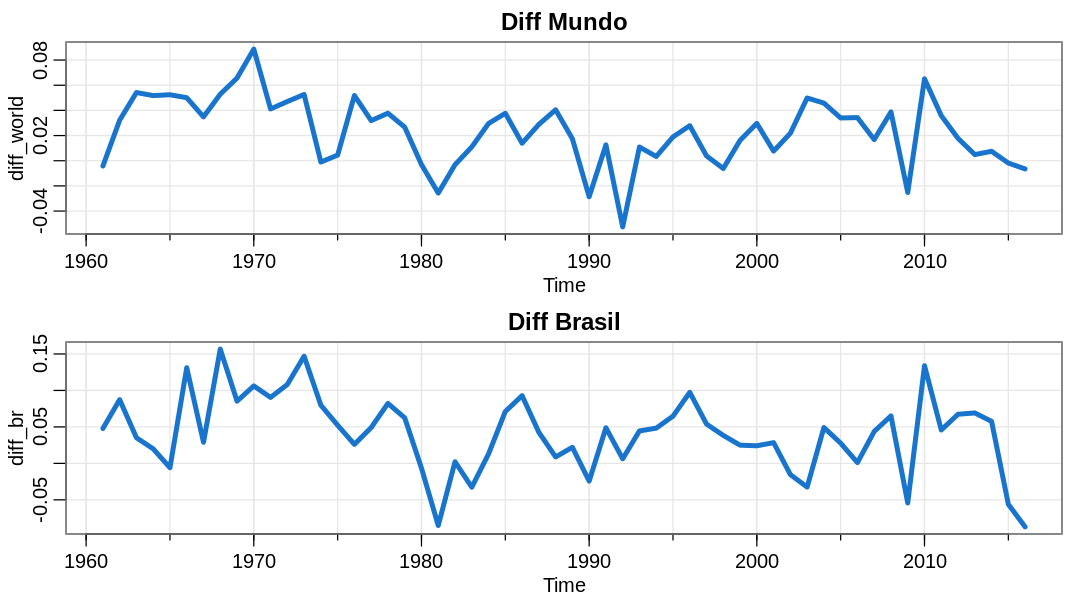

In [32]:
par(mfrow=c(2,1))
diff_world = diff(log(world_ts))
diff_br = diff(log(br_ts))
tsplot(diff_world, col=4, lwd=4, main = 'Diff Mundo')
tsplot(diff_br, col=4, lwd=4, main = 'Diff Brasil')

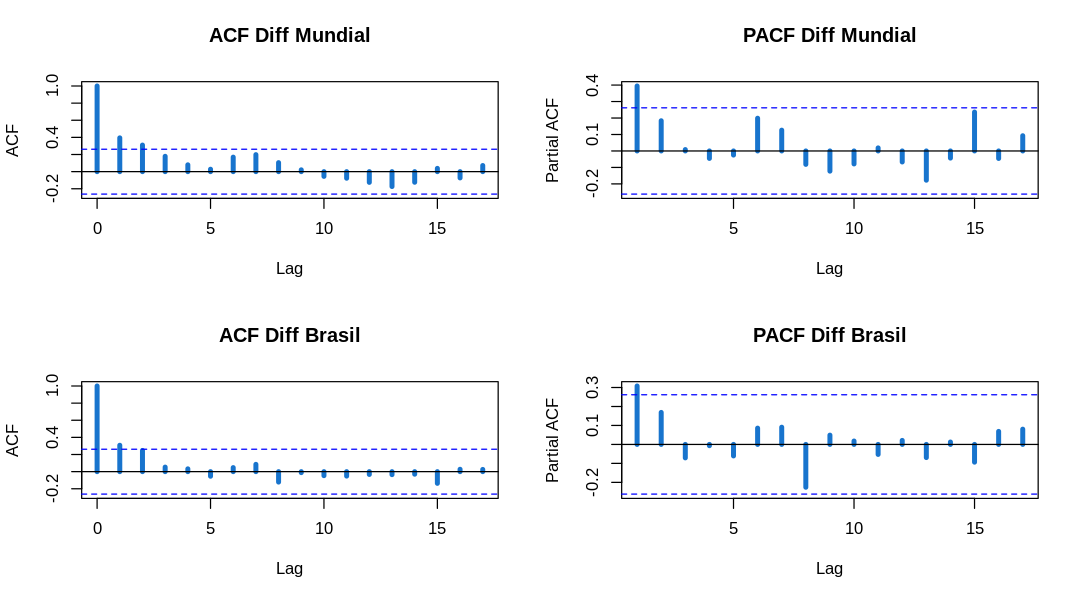

In [33]:
par(mfrow=c(2,2))

acf(diff_world, col=4, lwd=4, main = 'ACF Diff Mundial')
pacf(diff_world, col=4, lwd=4, main = 'PACF Diff Mundial')

acf(diff_br, col=4, lwd=4, main = 'ACF Diff Brasil')
pacf(diff_br, col=4, lwd=4, main = 'PACF Diff Brasil')

### Arima

In [34]:
fit_arima_world = Arima(world_ts, order = c(1,1,0), include.drift = TRUE)
fit_arima_world

Series: world_ts 
ARIMA(1,1,0) with drift 

Coefficients:
         ar1      drift
      0.1949  434509.51
s.e.  0.1326   87420.13

sigma^2 estimated as 289542463611:  log likelihood=-817.43
AIC=1640.85   AICc=1641.31   BIC=1646.93

In [35]:
fit_arima_br = Arima(br_ts, order = c(1,1,0), include.drift = TRUE)
fit_arima_br

Series: br_ts 
ARIMA(1,1,0) with drift 

Coefficients:
         ar1     drift
      0.2700  7061.615
s.e.  0.1445  2557.049

sigma^2 estimated as 202929768:  log likelihood=-614.07
AIC=1234.15   AICc=1234.61   BIC=1240.23


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0) with drift
Q* = 4.4948, df = 8, p-value = 0.81

Model df: 2.   Total lags used: 10



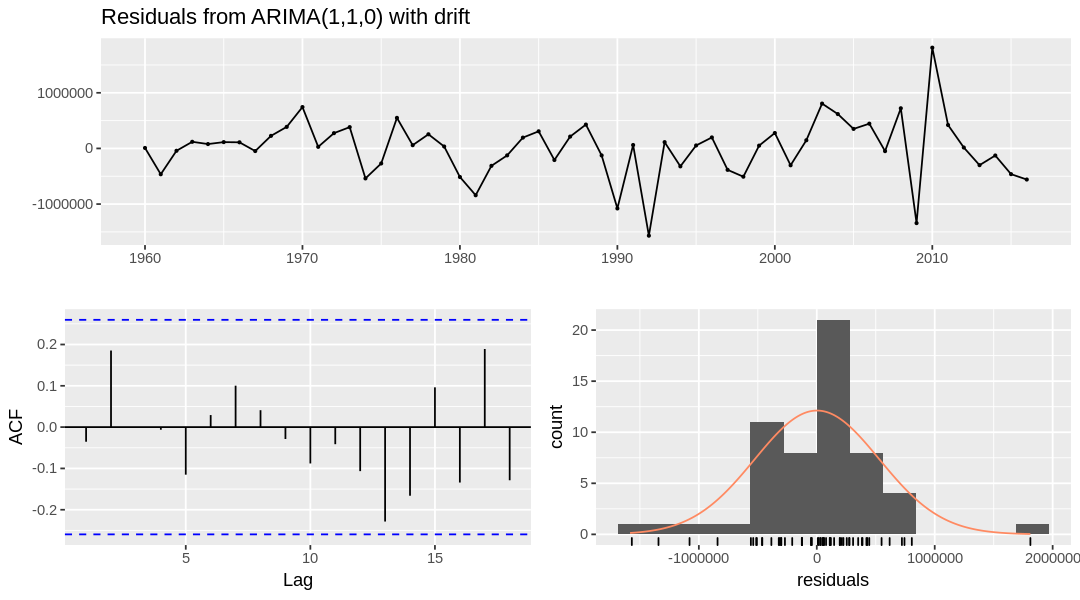


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0) with drift
Q* = 8.2024, df = 8, p-value = 0.414

Model df: 2.   Total lags used: 10



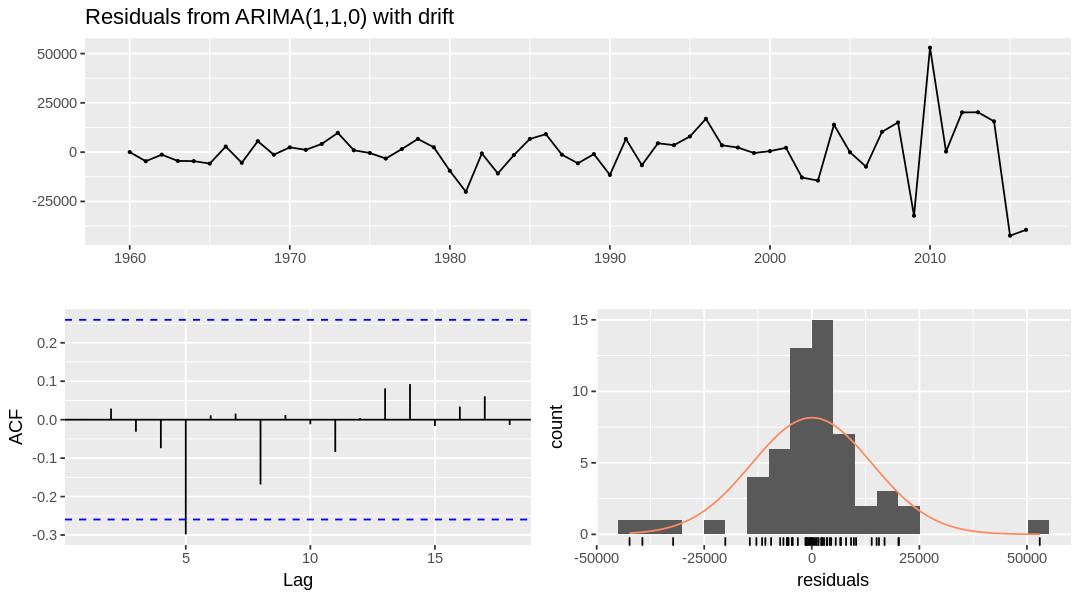

In [36]:
par(mfrow=c(2,1))
checkresiduals(fit_arima_world)
checkresiduals(fit_arima_br)

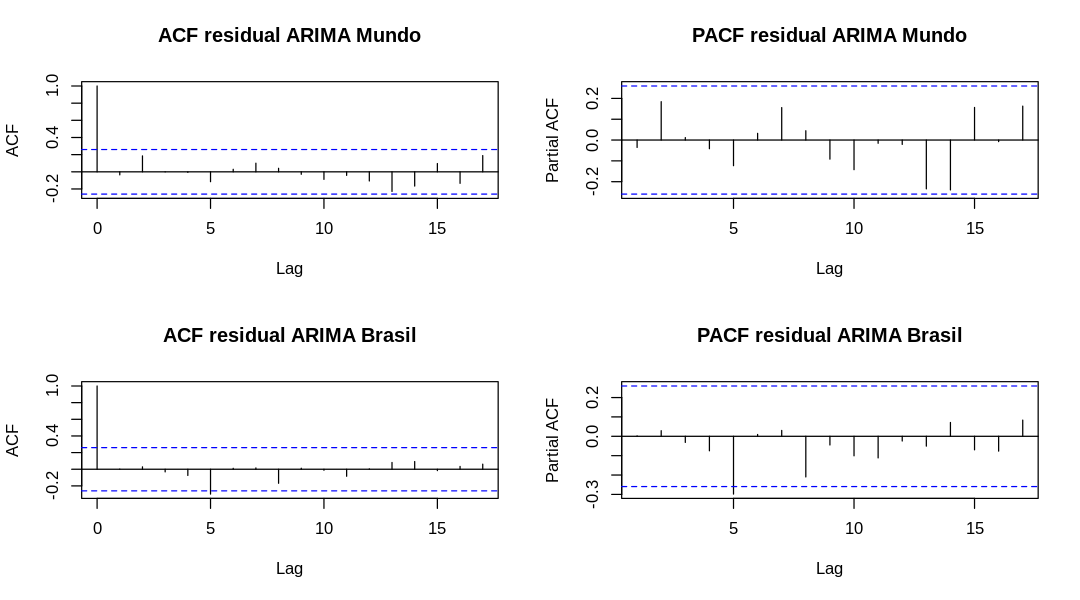

In [37]:
par(mfrow=c(2,2))

acf(residuals(fit_arima_world), main = 'ACF residual ARIMA Mundo')
pacf(residuals(fit_arima_world), main = 'PACF residual ARIMA Mundo')

acf(residuals(fit_arima_br), main = 'ACF residual ARIMA Brasil')
pacf(residuals(fit_arima_br), main = 'PACF residual ARIMA Brasil')

### Predicción

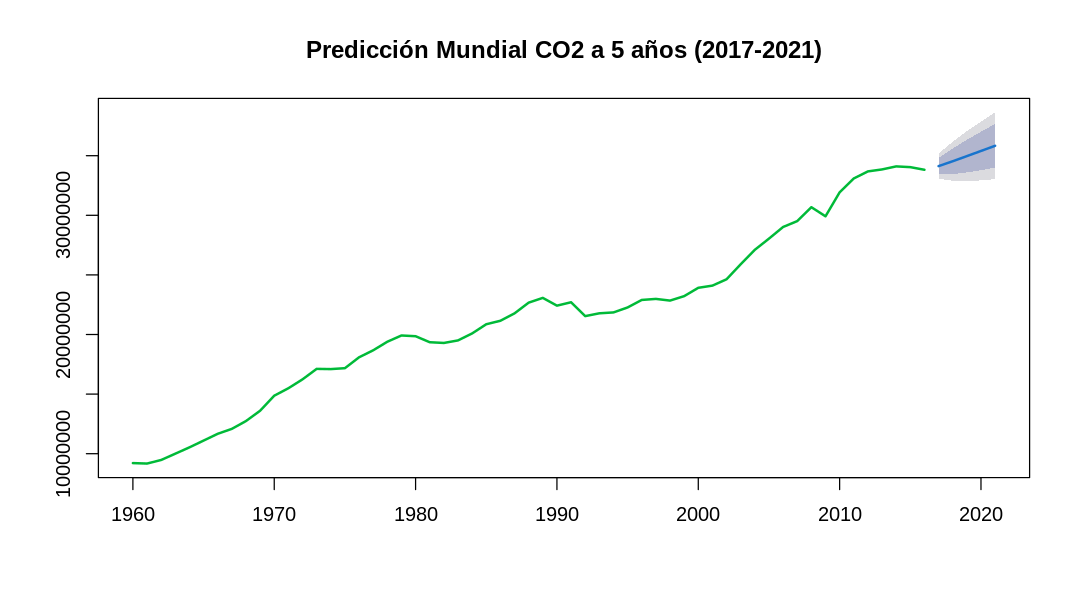

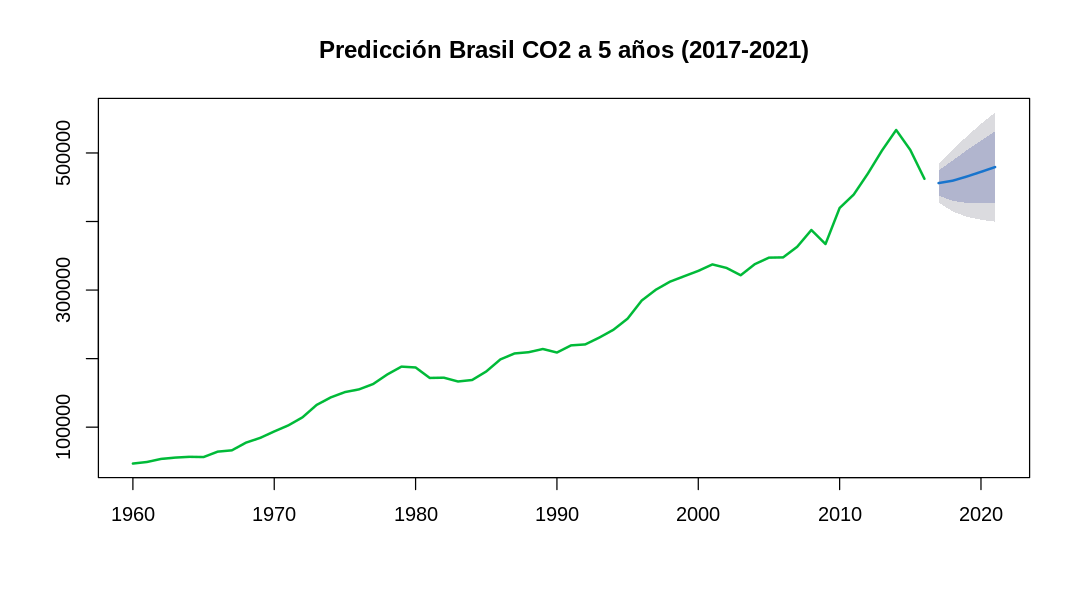

In [38]:
plot(forecast(fit_arima_world, h=5), lwd=2, col=3, main='Predicción Mundial CO2 a 5 años (2017-2021)')
plot(forecast(fit_arima_br, h=5), lwd=2, col=3, main='Predicción Brasil CO2 a 5 años (2017-2021)')